# Twitter Sentiment Analysis with LSTM 

In this Notebook , i've done the sentiment analysis of tweets from Twitter, using NLP for a hackathon on AnalyticsVidhya. The dataset can be downloaded from https://datahack.analyticsvidhya.com/contest/practice-problem-twitter-sentiment-analysis/ .

# Importing Libraries:

In [56]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Importing Dataset:

In [57]:
from google.colab import files
uploaded = files.upload()

Saving train_E6oV3lV.csv to train_E6oV3lV (1).csv


In [58]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['train_E6oV3lV.csv']))
# Dataset is now stored in a Pandas Dataframe

##  Data Preprocessing:

In [59]:

dataset.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [60]:
dataset = dataset.drop(columns=['id'])

In [61]:
dataset.tail()

,label,tweet
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,0,thank you @user for you follow


In [62]:
dataset['tweet'] = dataset['tweet'].str.lower()
dataset.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


Removing Stopwords:

In [63]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
STOPWORDS = set(stopwords.words("english"))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['tweet'] = dataset['tweet'].apply(lambda text: cleaning_stopwords(text))
dataset.head(5)

,label,tweet
0,0,@user father dysfunctional selfish drags kids ...
1,0,@user @user thanks #lyft credit can't use caus...
2,0,bihday majesty
3,0,#model love u take u time urð±!!! ððð...
4,0,factsguide: society #motivation


Removing Punctuations:

In [65]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['tweet']= dataset['tweet'].apply(lambda x: cleaning_punctuations(x))
dataset.head(5)

,label,tweet
0,0,user father dysfunctional selfish drags kids d...
1,0,user user thanks lyft credit cant use cause of...
2,0,bihday majesty
3,0,model love u take u time urð± ðððð...
4,0,factsguide society motivation


Removing Numbers:

In [66]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', ' ', data)
dataset['tweet'] = dataset['tweet'].apply(lambda x : cleaning_numbers(x))
dataset.head(5)

,label,tweet
0,0,user father dysfunctional selfish drags kids d...
1,0,user user thanks lyft credit cant use cause of...
2,0,bihday majesty
3,0,model love u take u time urð± ðððð...
4,0,factsguide society motivation


Stemming:

In [67]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()
def stem(text):
  return " ".join([porter.stem(word) for word in str(text).split()])
dataset['tweet'] = dataset['tweet'].apply(lambda text: stem(text))
dataset.head()

,label,tweet
0,0,user father dysfunct selfish drag kid dysfunct...
1,0,user user thank lyft credit cant use caus offe...
2,0,bihday majesti
3,0,model love u take u time urð± ðððð...
4,0,factsguid societi motiv


Removing repeating characters:

In [68]:
def removing_repeating_chars(text):
    return re.sub(r'(.)1+', r'1',text)
dataset['tweet'] = dataset['tweet'].apply(lambda text: removing_repeating_chars(text))
dataset.head(5)

,label,tweet
0,0,user father dysfunct selfish drag kid dysfunct...
1,0,user user thank lyft credit cant use caus offe...
2,0,bihday majesti
3,0,model love u take u time urð± ðððð...
4,0,factsguid societi motiv


In [69]:
# To list:
# for visualizing the frequency of lengths of tweets.

sentences = dataset['tweet'].tolist()
labels = dataset['label'].tolist()
print(len(sentences))
sentences[4]

31962


'factsguid societi motiv'

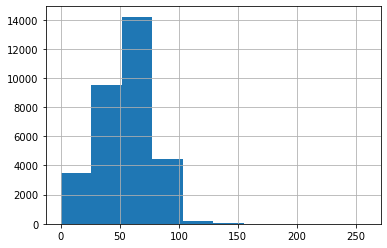

count    31962.000000
mean        55.455823
std         21.516563
min          0.000000
25%         40.000000
50%         58.000000
75%         71.000000
max        258.000000
dtype: float64

In [70]:
sentences_len = [len(x) for x in sentences]
pd.Series(sentences_len).hist()
plt.show()
pd.Series(sentences_len).describe()

In [72]:
training_size = int(len(sentences) * 0.92)
training_sentences = dataset['tweet'].iloc[0:training_size].values
validation_sentences = dataset['tweet'].iloc[:training_size].values
training_labels = dataset['label'].iloc[0:training_size].values
validation_labels = dataset['label'].iloc[:training_size].values
Y_train = np.array(training_labels)
Y_valid = np.array(validation_labels)

## **Tokenizing and Pad**

In [109]:
vocab_size = 10000 #Earlier value 5K
max_len = 258
embedding_dim = 150 #Earlier value 32
oov_tok = "<OOV>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)
tokenized_rep_train = tokenizer.texts_to_sequences(training_sentences)
tokenized_rep_valid = tokenizer.texts_to_sequences(validation_sentences)


In [110]:
tokenized_rep_train[4]


[2620, 1273, 172]

In [111]:
padded_train = pad_sequences(tokenized_rep_train,padding = 'pre', maxlen = max_len) 
padded_valid = pad_sequences(tokenized_rep_valid,padding = 'pre', maxlen = max_len) 
padded_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [112]:
padded_valid[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

## **Building the Model**

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(Bidirectional(LSTM(150, dropout = 0.3)))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer= 'adam',metrics=['accuracy'])

In [115]:

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 258, 150)          1500000   
_________________________________________________________________
bidirectional_7 (Bidirection (None, 300)               361200    
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 1806      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 7         
Total params: 1,863,013
Trainable params: 1,863,013
Non-trainable params: 0
_________________________________________________________________
None


In [116]:
num_epochs=3
modelo = model.fit(padded_train,training_labels, epochs=num_epochs, validation_data=(padded_valid, validation_labels))

Epoch 1/3
919/919 [==============================] - 49s 50ms/step - loss: 0.1550 - accuracy: 0.9508 - val_loss: 0.0850 - val_accuracy: 0.9735
Epoch 2/3
919/919 [==============================] - 46s 50ms/step - loss: 0.0825 - accuracy: 0.9714 - val_loss: 0.0537 - val_accuracy: 0.9812
Epoch 3/3
919/919 [==============================] - 46s 50ms/step - loss: 0.0575 - accuracy: 0.9801 - val_loss: 0.0401 - val_accuracy: 0.9863


Text(0, 0.5, 'Accuracy')

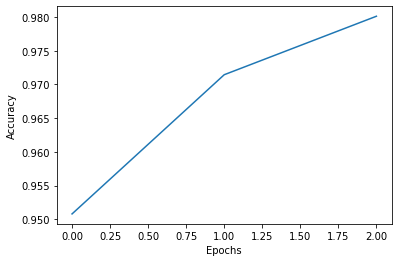

In [117]:


plt.plot(modelo.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

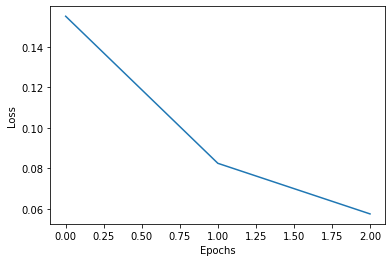

In [118]:


plt.plot(modelo.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

## **Testing**

In [92]:
uploaded =files.upload()

Saving test_tweets_anuFYb8.csv to test_tweets_anuFYb8 (1).csv


In [119]:
test_dataset = pd.read_csv(io.BytesIO(uploaded['test_tweets_anuFYb8.csv'])) 

In [120]:
test_dataset.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [121]:
test_dataset.tail()

,id,tweet
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."
17196,49159,"my song ""so glad"" free download! #shoegaze ..."


In [122]:
test_dataset = test_dataset['tweet']
test_dataset.head()

0    #studiolife #aislife #requires #passion #dedic...
1     @user #white #supremacists want everyone to s...
2    safe ways to heal your #acne!!    #altwaystohe...
3    is the hp and the cursed child book up for res...
4      3rd #bihday to my amazing, hilarious #nephew...
Name: tweet, dtype: object

In [123]:
test_dataset = test_dataset.str.lower()
test_dataset.head()

0    #studiolife #aislife #requires #passion #dedic...
1     @user #white #supremacists want everyone to s...
2    safe ways to heal your #acne!!    #altwaystohe...
3    is the hp and the cursed child book up for res...
4      3rd #bihday to my amazing, hilarious #nephew...
Name: tweet, dtype: object

In [124]:
test_dataset = test_dataset.apply(lambda text: cleaning_stopwords(text))
test_dataset.head()

0    #studiolife #aislife #requires #passion #dedic...
1    @user #white #supremacists want everyone see n...
2    safe ways heal #acne!! #altwaystoheal #healthy...
3    hp cursed child book reservations already? yes...
4    3rd #bihday amazing, hilarious #nephew eli ahm...
Name: tweet, dtype: object

In [125]:
test_dataset= test_dataset.apply(lambda x: cleaning_punctuations(x))
test_dataset.head()

0    studiolife aislife requires passion dedication...
1    user white supremacists want everyone see new ...
2    safe ways heal acne altwaystoheal healthy healing
3    hp cursed child book reservations already yes ...
4    3rd bihday amazing hilarious nephew eli ahmir ...
Name: tweet, dtype: object

In [126]:
test_dataset = test_dataset.apply(lambda x : cleaning_numbers(x))
test_dataset.head(5)

0    studiolife aislife requires passion dedication...
1    user white supremacists want everyone see new ...
2    safe ways heal acne altwaystoheal healthy healing
3    hp cursed child book reservations already yes ...
4     rd bihday amazing hilarious nephew eli ahmir ...
Name: tweet, dtype: object

In [127]:
test_dataset = test_dataset.apply(lambda text: stem(text))
test_dataset.head()

0    studiolif aislif requir passion dedic willpow ...
1    user white supremacist want everyon see new â...
2            safe way heal acn altwaystoh healthi heal
3    hp curs child book reserv alreadi ye where no ...
4    rd bihday amaz hilari nephew eli ahmir uncl da...
Name: tweet, dtype: object

In [128]:
test_dataset = test_dataset.apply(lambda text: removing_repeating_chars(text))
test_dataset.head()

0    studiolif aislif requir passion dedic willpow ...
1    user white supremacist want everyon see new â...
2            safe way heal acn altwaystoh healthi heal
3    hp curs child book reserv alreadi ye where no ...
4    rd bihday amaz hilari nephew eli ahmir uncl da...
Name: tweet, dtype: object

In [129]:
tokenized_rep_test = tokenizer.texts_to_sequences(test_dataset)
tokenized_rep_test[0]

[1, 1, 2866, 1141, 2594, 1, 90, 1]

In [130]:
padded_test = pad_sequences(tokenized_rep_test,padding = 'pre', maxlen = max_len) 
padded_test[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [131]:
Y_pred = (model.predict(padded_test) > 0.5).astype("int32")

In [132]:
print(Y_pred)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [133]:
len(Y_pred)

17197

Writing the predictions in csv file for submission:

In [134]:
import csv 
cnt = 0;
id = 31963
pred = Y_pred.tolist();
with open('test_predictions.csv', 'w', newline = '') as csvfile:
  fieldnames = ['id','label']
  thewriter = csv.DictWriter(csvfile, fieldnames = fieldnames)
  thewriter.writeheader()
  for i in range (0, len(Y_pred)):
    cnt+=1
    thewriter.writerow({'id':id, 'label':pred[i][0]})
    id+=1
    